# LSTM architecture comparison

This notebook discusses predictions made using a selection of different LSTM architectures, primarily hidden layer sizes. The minimal model *A* is used, with four input features and one output target.

In general, the model architecture has the following effect on model performance:
- Too few neurons or layers may make the model incapable of discovering nonlinear and/or  deep patterns within the dataset, and thus underfit
- Too many neurons or layers may make the model discover underlying patterns that are complex, but not relevant to the problem, and thus overfit.

Finding the optimal model architecture and model hyperparameters generally requires extensive trial and error, e.g. in the form of a grid search. For this comparison, some hyperparameters known to work well on the relevant datasets are chosen (i.e. the library defaults).

Dataset *G* is used because this dataset offers the largest amount of data samples and thus is assumed most appropriate for LSTM models.

In [1]:
# %load 3_lstm_arch_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)
    
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        score=score,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    lstm_1x_16 = mlModule.LSTM('LSTM 1x16'+' mod'+model, layers=[16], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_1x_32 = mlModule.LSTM('LSTM 1x32'+' mod'+model, layers=[32], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_1x_64 = mlModule.LSTM('LSTM 1x64'+' mod'+model, layers=[64], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_1x_128 = mlModule.LSTM('LSTM 1x128'+' mod'+model, layers=[128], dropout=0.2, recurrentDropout=0.2, epochs=1000)

    lstm_2x_16 = mlModule.LSTM('LSTM 2x16'+' mod'+model, layers=[16, 16], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_2x_32 = mlModule.LSTM('LSTM 2x32'+' mod'+model, layers=[32, 32], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_2x_64 = mlModule.LSTM('LSTM 2x64'+' mod'+model, layers=[64, 64], dropout=0.2, recurrentDropout=0.2, epochs=1000)
    lstm_2x_128 = mlModule.LSTM('LSTM 2x128'+' mod'+model, layers=[128, 128], dropout=0.2, recurrentDropout=0.2, epochs=1000)

    linear_cv = mlModule.Linear_Regularized('Linear rCV'+' mod'+model)

    ensemble = mlModule.Ensemble('LSTM 1x128 + Linear'+' mod'+model, [lstm_1x_128, linear_cv])
    ensemble2 = mlModule.Ensemble('LSTM 2x64 + Linear'+' mod'+model, [lstm_2x_64, linear_cv])

    modelList = [
        linear_cv,
        lstm_1x_16,
        lstm_1x_32,
        lstm_2x_16,
        lstm_2x_32,
    ]

    initTrainPredict(modelList)

    modelList = [
        linear_cv,
        lstm_1x_64,
        lstm_1x_128,
        lstm_2x_64,
        lstm_2x_128,
    ]

    initTrainPredict(modelList)

    modelList = [
        linear_cv,
        ensemble,
        ensemble2,
    ]

    initTrainPredict(modelList)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

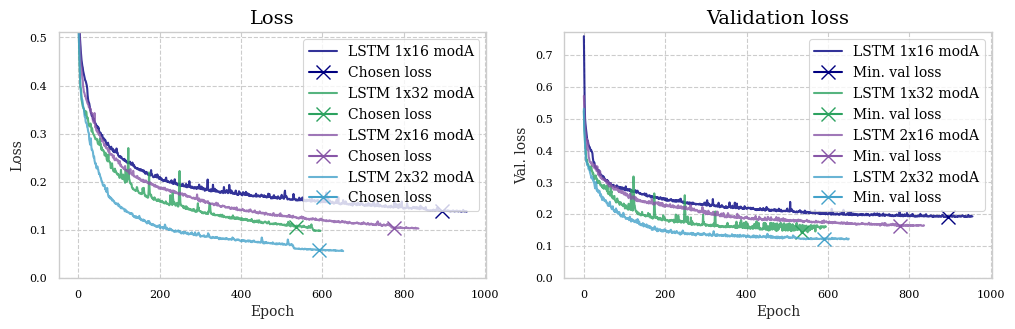

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.3234   |   0.0673   |
|  LSTM 1x16 modA |    0.5872   |  -0.3431   |
|  LSTM 1x32 modA |    0.5922   |   0.1686   |
|  LSTM 2x16 modA |    0.5176   |   0.0509   |
|  LSTM 2x32 modA |    0.5065   |  -0.4897   |
+-----------------+-------------+------------+


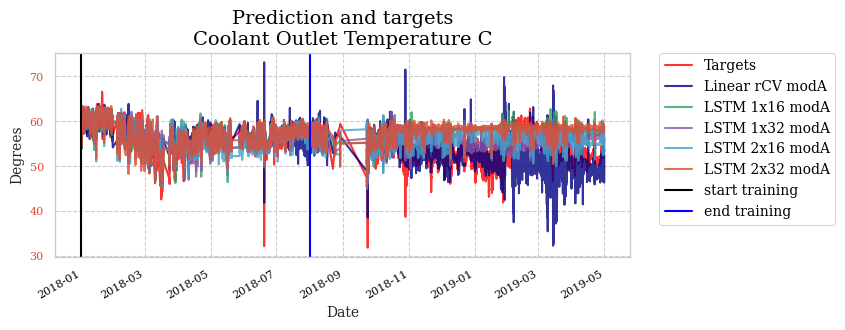

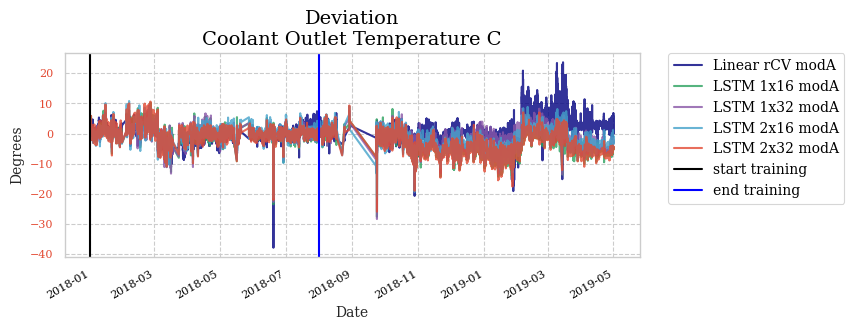

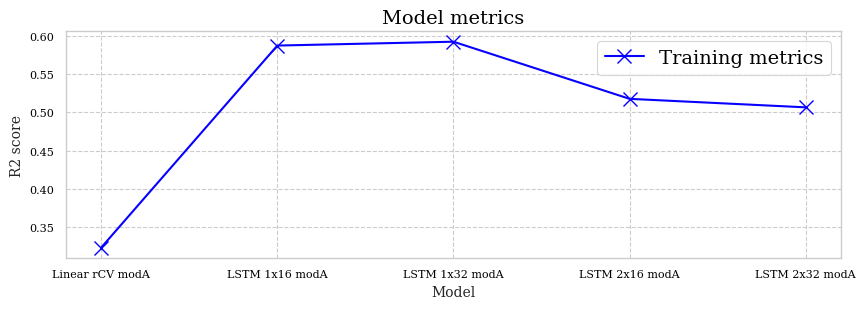

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model LSTM 1x64 modA was loaded from file
Model LSTM 1x128 modA was loaded from file
Model LSTM 2x64 modA was loaded from file
Model LSTM 2x128 modA was loaded from file
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  LSTM 1x64 modA |  0.05366  |   0.05791   |    0.127059   |  510   |
| LSTM 1x128 modA |  0.040003 |   0.046823  |    0.11811    |  312   |
|  LSTM 2x64 modA |  0.04222  |   0.047475  |    0.128156   |  387   |
| LSTM 2x128 modA |  0.03093  |    0.0375   |    0.112352   |  273   |
+-----------------+-----------+-------------+---------------+--------+


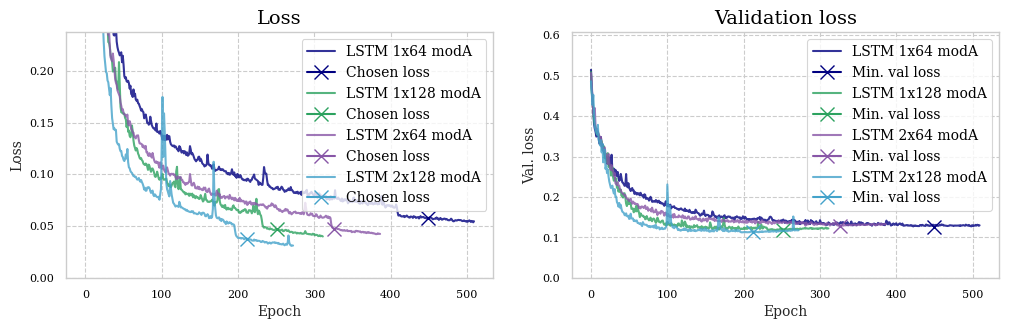

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.3234   |   0.0673   |
|  LSTM 1x64 modA |    0.5766   |  -0.8497   |
| LSTM 1x128 modA |    0.5912   |  -0.6638   |
|  LSTM 2x64 modA |    0.5955   |  -0.3175   |
| LSTM 2x128 modA |    0.6553   |   -0.221   |
+-----------------+-------------+------------+


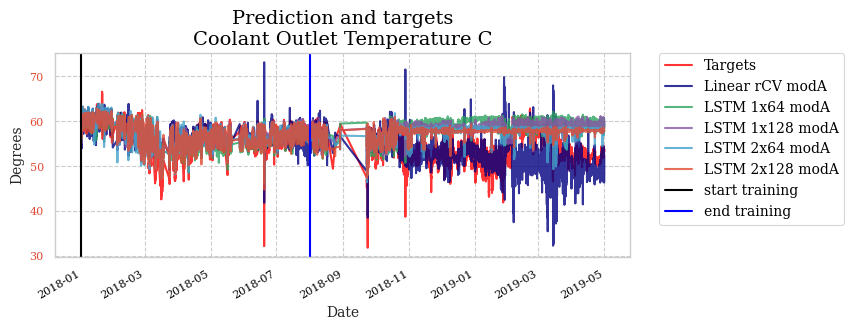

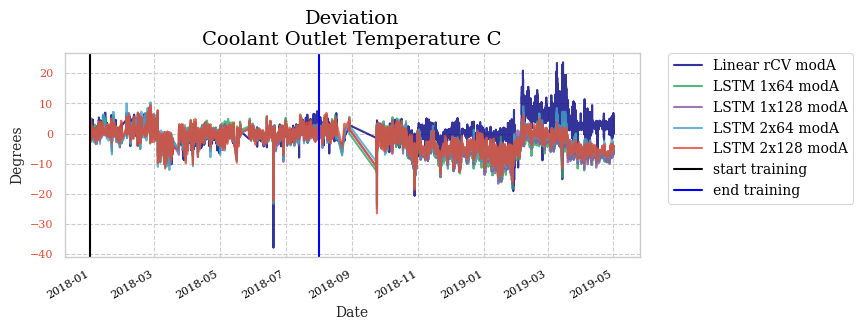

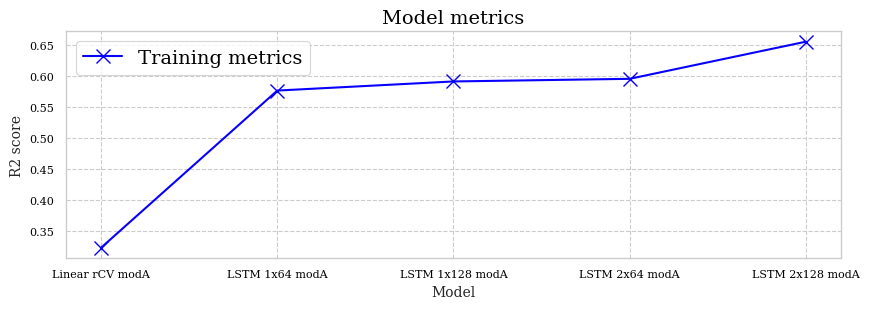

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model LSTM 1x128 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble LSTM 1x128 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[0.67848729 0.13153687]]
Model LSTM 2x64 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble LSTM 2x64 + Linear modA
    Trained weights for Linear rCV modA:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[0.69656638 0.12861361]]
+-------------------------------------------+-----------+-------------+---------------+--------+
|                   Model                   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------------------------------------+-----------+-------------+---------------+--------+
| L

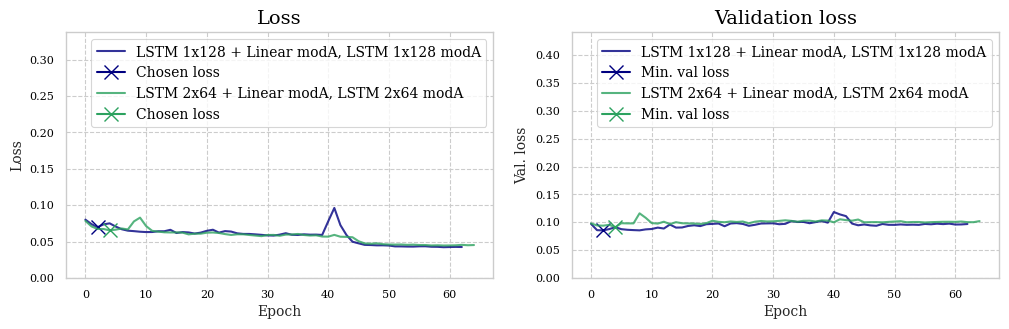

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
|     Linear rCV modA      |    0.3234   |   0.0673   |
| LSTM 1x128 + Linear modA |    0.5927   |  -0.1597   |
| LSTM 2x64 + Linear modA  |    0.615    |   0.1307   |
+--------------------------+-------------+------------+


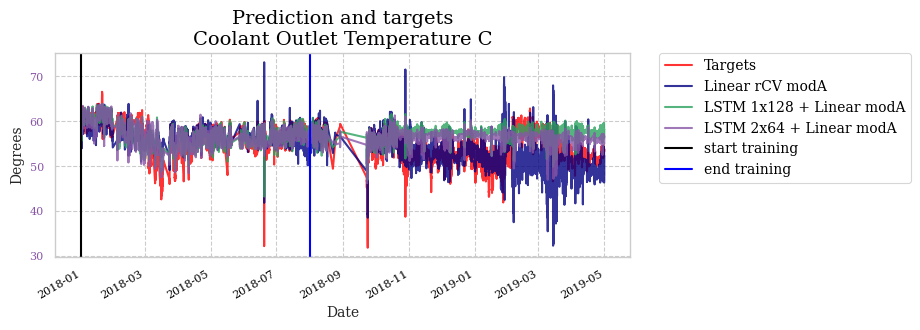

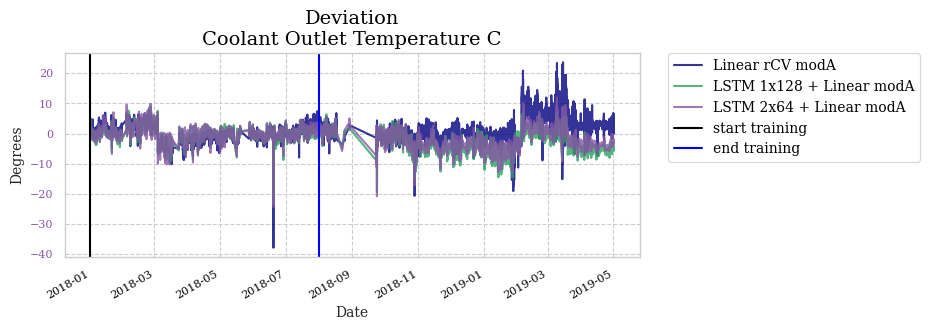

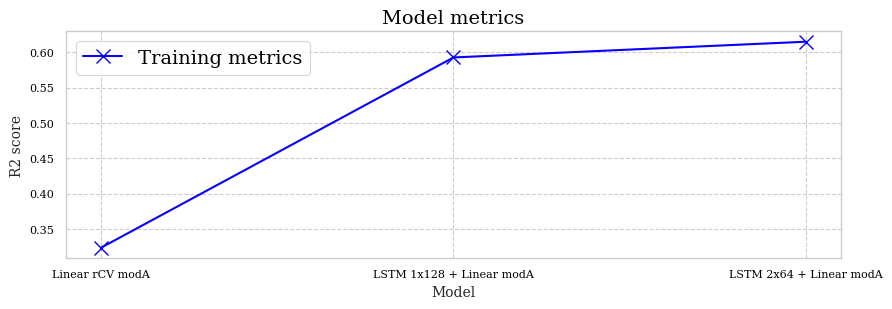

In [4]:
pred('F', 'A', '30min')

In [5]:
mlModule.reset()

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

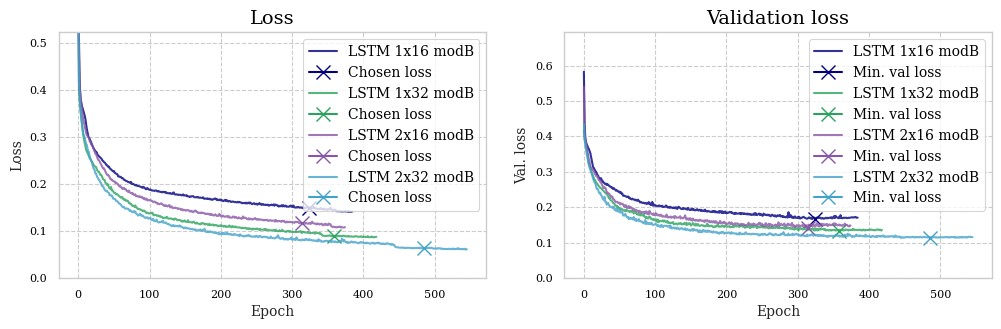

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.6158   |   0.5949   |
|  LSTM 1x16 modB |    0.6826   |  -0.5278   |
|  LSTM 1x32 modB |    0.7582   |  -0.1426   |
|  LSTM 2x16 modB |    0.8301   |  -0.6119   |
|  LSTM 2x32 modB |    0.7887   |  -0.1985   |
+-----------------+-------------+------------+


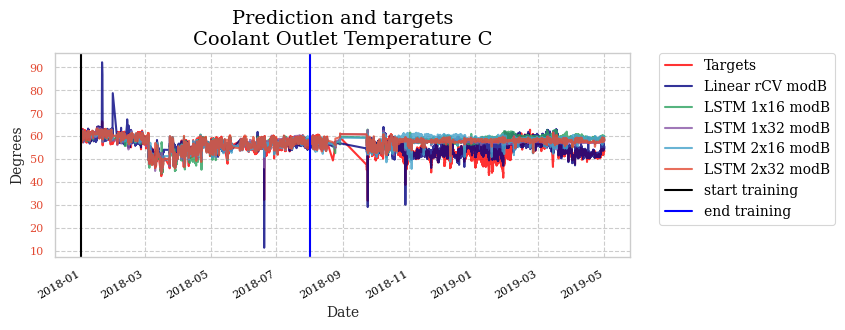

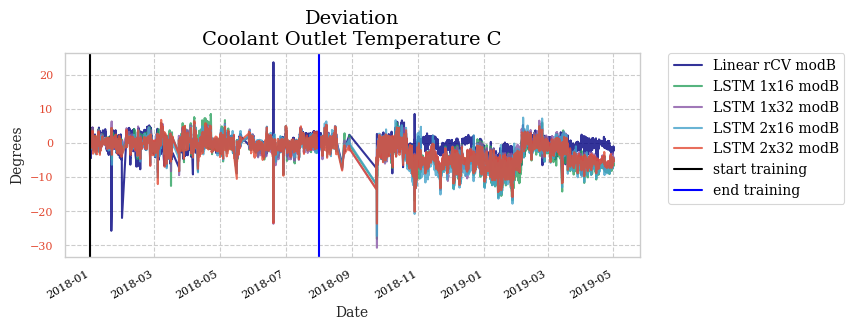

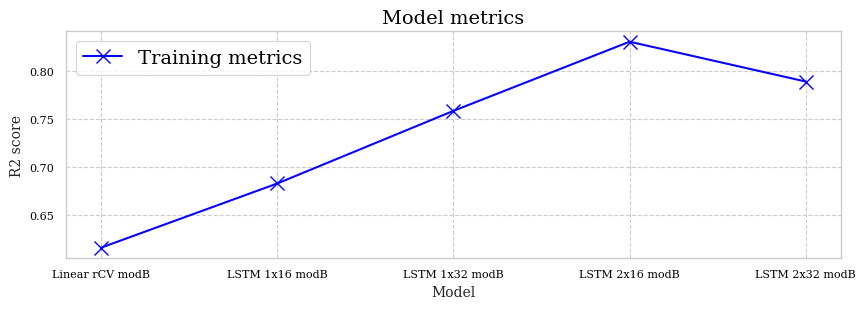

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
Model LSTM 1x64 modB was loaded from file
Model LSTM 1x128 modB was loaded from file
Model LSTM 2x64 modB was loaded from file
Model LSTM 2x128 modB was loaded from file
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  LSTM 1x64 modB |  0.076693 |   0.08329   |    0.109088   |  268   |
| LSTM 1x128 modB |  0.044496 |   0.051678  |    0.119191   |  265   |
|  LSTM 2x64 modB |  0.045119 |   0.050037  |    0.107962   |  326   |
| LSTM 2x128 modB |  0.030248 |   0.038187  |    0.116016   |  257   |
+-----------------+-----------+-------------+---------------+--------+


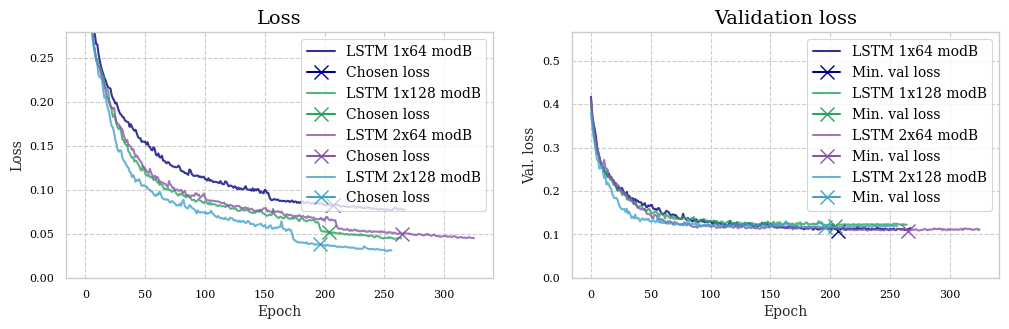

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.6158   |   0.5949   |
|  LSTM 1x64 modB |    0.7916   |  -0.2643   |
| LSTM 1x128 modB |    0.784    |  -0.0828   |
|  LSTM 2x64 modB |    0.8233   |  -0.2749   |
| LSTM 2x128 modB |    0.7984   |  -0.1698   |
+-----------------+-------------+------------+


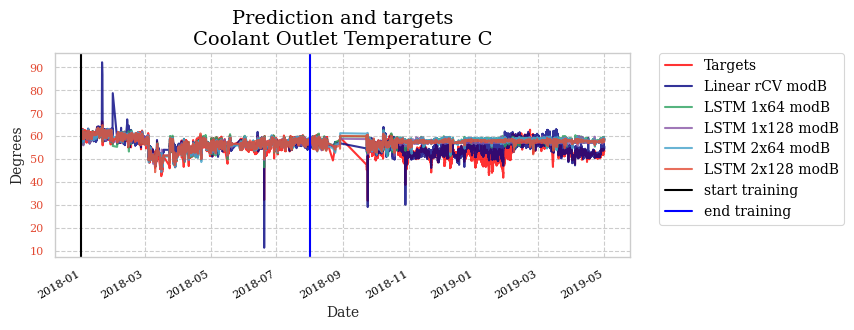

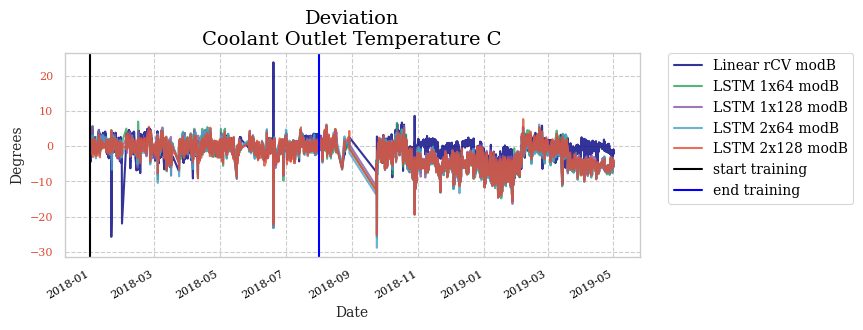

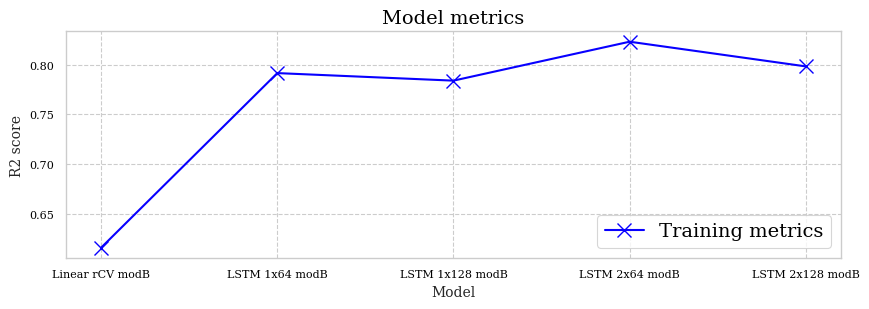

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
Model LSTM 1x128 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble LSTM 1x128 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
    Trained weights for Linear model of ensemble:
[[0.73492032 0.18765173]]
Model LSTM 2x64 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble LSTM 2x64 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
    Trained weights for Linear model of ensemble:
[[0.77475775 0.16917176]]
+-------------------------------------------+-----------+-------------+---------------+--------+
|                   Model                   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------------------------------------+-----------+-------

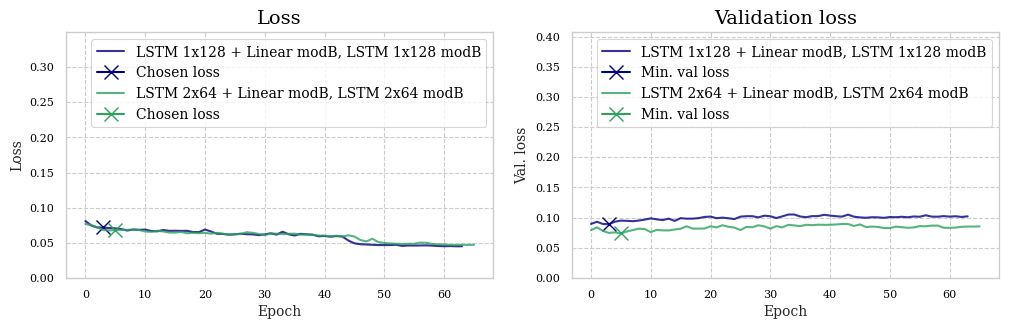

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
|     Linear rCV modB      |    0.6158   |   0.5949   |
| LSTM 1x128 + Linear modB |    0.7993   |   0.2154   |
| LSTM 2x64 + Linear modB  |    0.8371   |   0.0441   |
+--------------------------+-------------+------------+


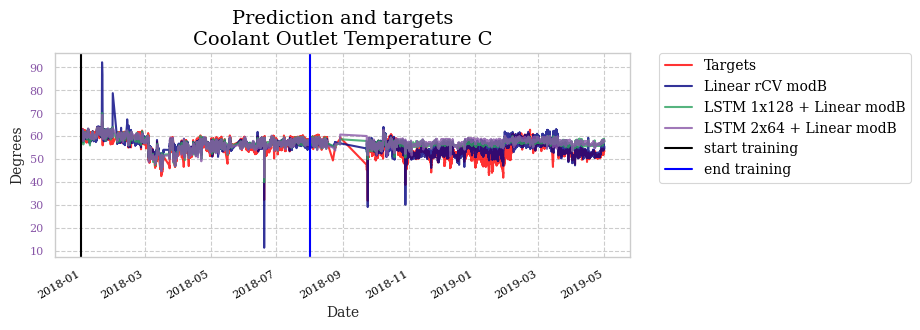

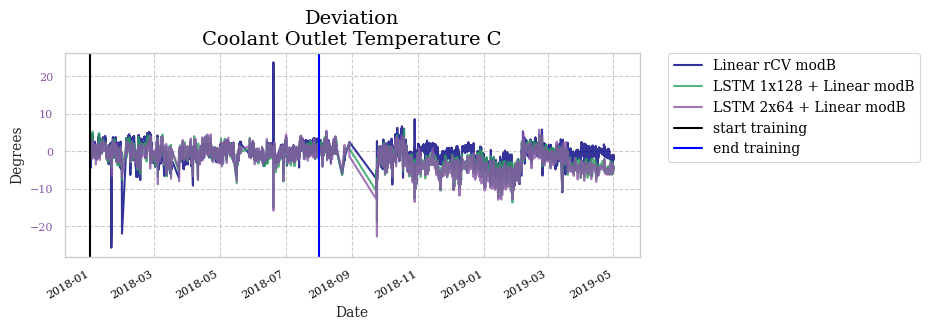

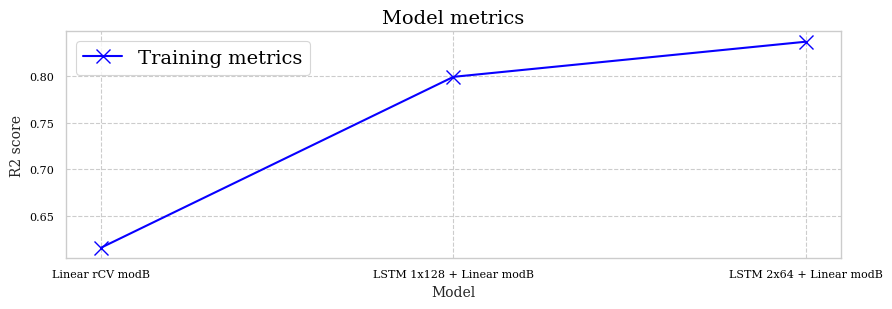

In [6]:
pred('F', 'B', '30min')

In [7]:
mlModule.reset()

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model LSTM 1x16 m

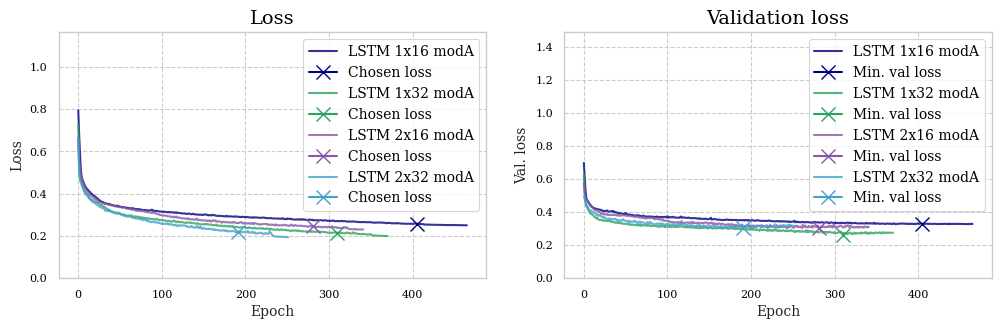

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.562    |  -1.2036   |
|  LSTM 1x16 modA |    0.6423   |  -0.9922   |
|  LSTM 1x32 modA |    0.578    |  -1.2029   |
|  LSTM 2x16 modA |    0.5423   |  -1.4594   |
|  LSTM 2x32 modA |    0.484    |  -1.6163   |
+-----------------+-------------+------------+


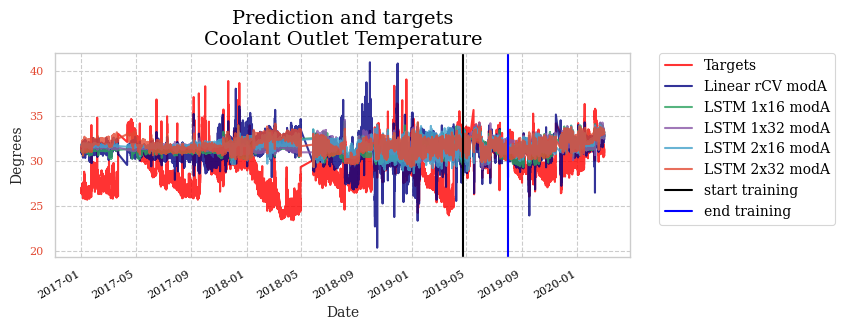

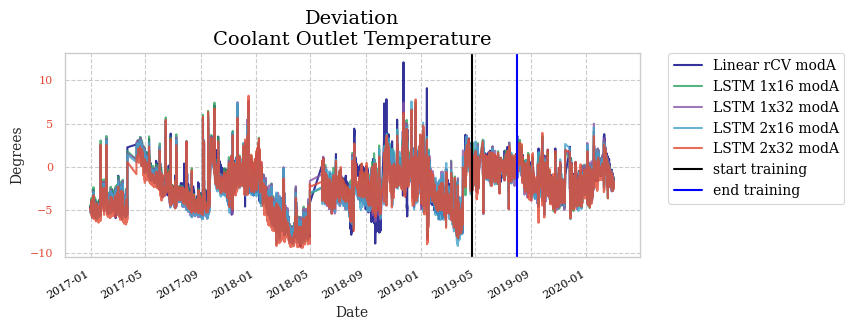

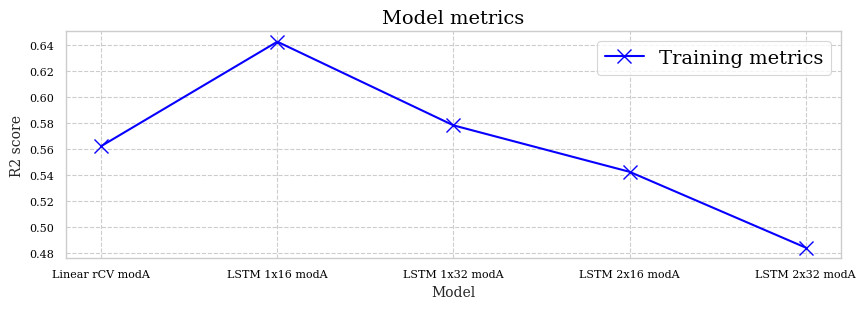

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model LSTM 1x64 modA was loaded from file
Model LSTM 1x128 modA was loaded from file
Model LSTM 2x64 modA was loaded from file
Model LSTM 2x128 modA was loaded from file
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  LSTM 1x64 modA |  0.164477 |   0.197553  |    0.309372   |  240   |
| LSTM 1x128 modA |  0.175977 |   0.247558  |    0.285719   |  130   |
|  LSTM 2x64 modA |  0.160259 |   0.209847  |    0.283333   |  190   |
| LSTM 2x128 modA |  0.081216 |   0.158171  |    0.273684   |  175   |
+-----------------+-----------+-------------+---------------+--------+


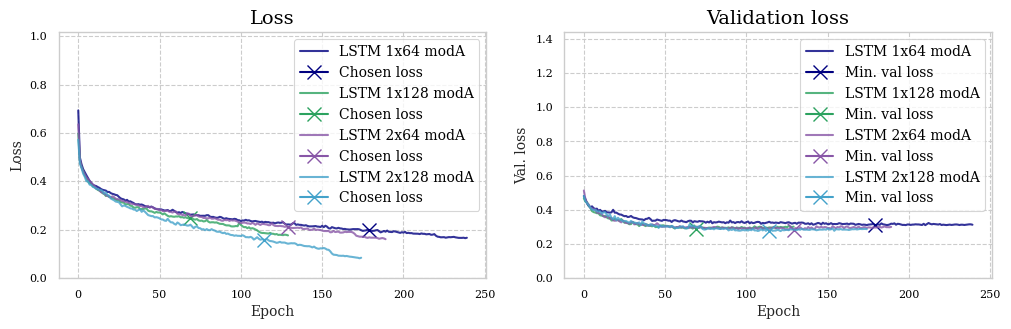

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modA |    0.562    |  -1.2036   |
|  LSTM 1x64 modA |    0.6305   |  -1.4968   |
| LSTM 1x128 modA |    0.6568   |  -1.8375   |
|  LSTM 2x64 modA |    0.6065   |  -1.2515   |
| LSTM 2x128 modA |    0.6113   |  -1.3507   |
+-----------------+-------------+------------+


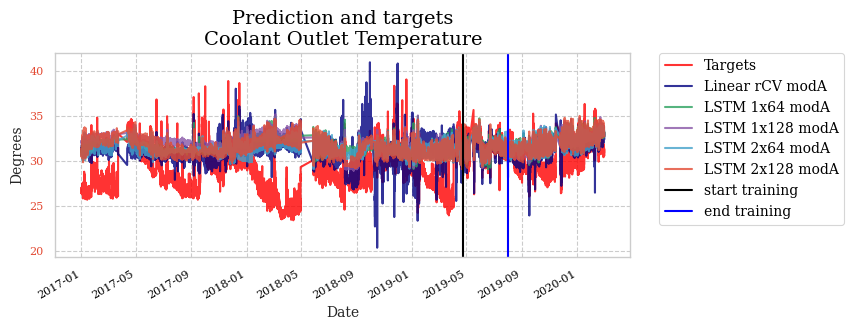

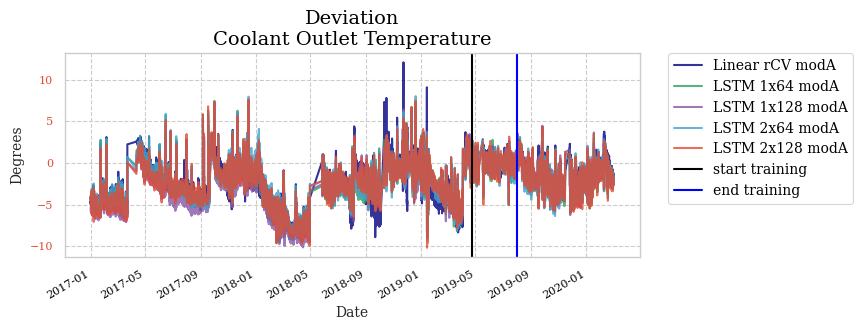

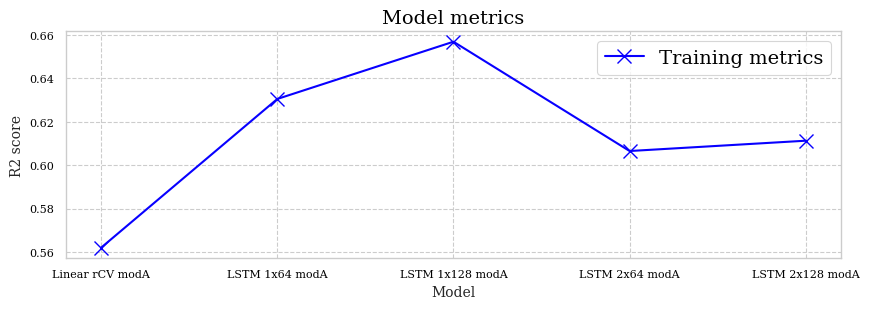

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model LSTM 1x128 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble LSTM 1x128 + Linear modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
    Trained weights for Linear model of ensemble:
[[0.55969419 0.35416284]]
Model LSTM 2x64 + Linear modA was loaded from file
Training submodel Linear rCV modA of Ensemble LSTM 2x64 + Linear modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
    Trained weights for Linear model of ensemble:
[[0.54958807 0.39084955]]
+-------------------------------------------+-----------+-------------+---------------+--------+
|                   Model                   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------------------------------------+-----------+-------------+---------------+--------+
| L

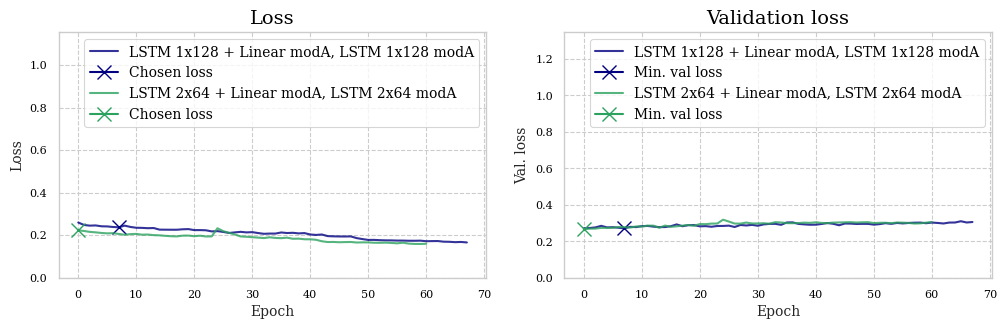

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
|     Linear rCV modA      |    0.562    |  -1.2036   |
| LSTM 1x128 + Linear modA |    0.7198   |  -1.5682   |
| LSTM 2x64 + Linear modA  |    0.7364   |  -1.1351   |
+--------------------------+-------------+------------+


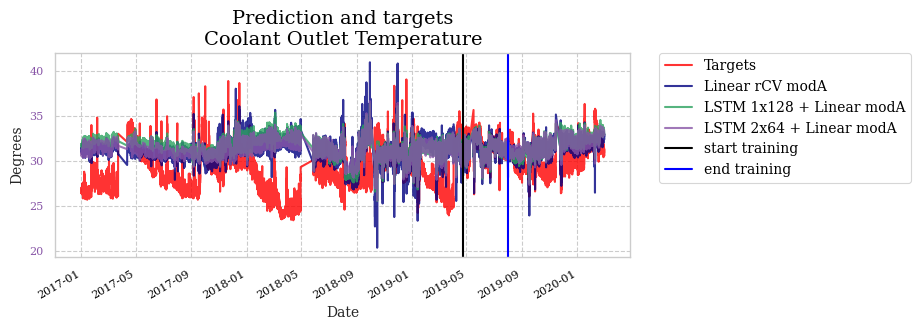

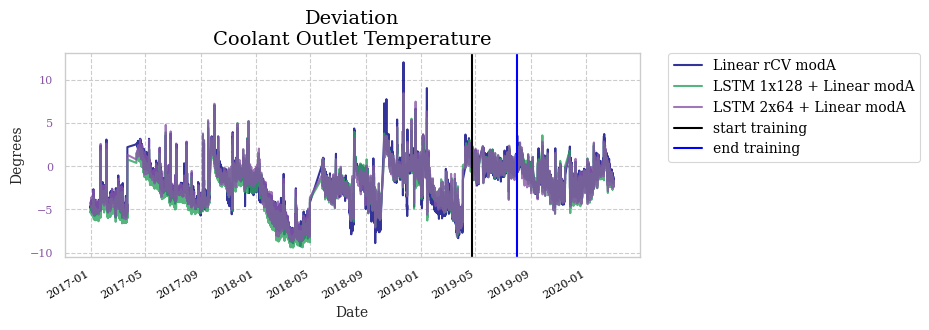

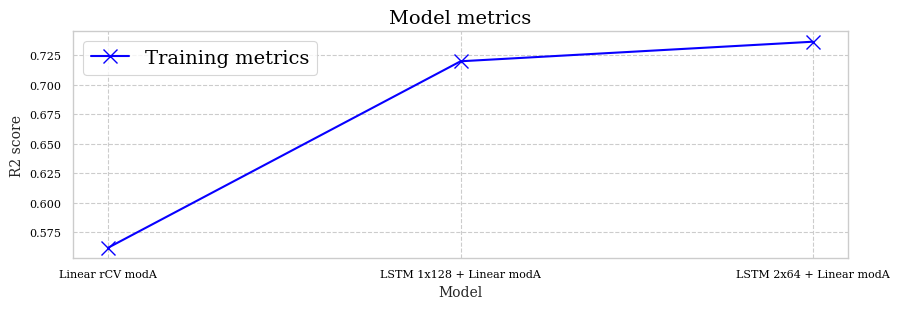

In [8]:
pred('G', 'A', '30min')

In [9]:
mlModule.reset()

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature
Col. 5 : TIC0022U - Coolant Valve Opening

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   

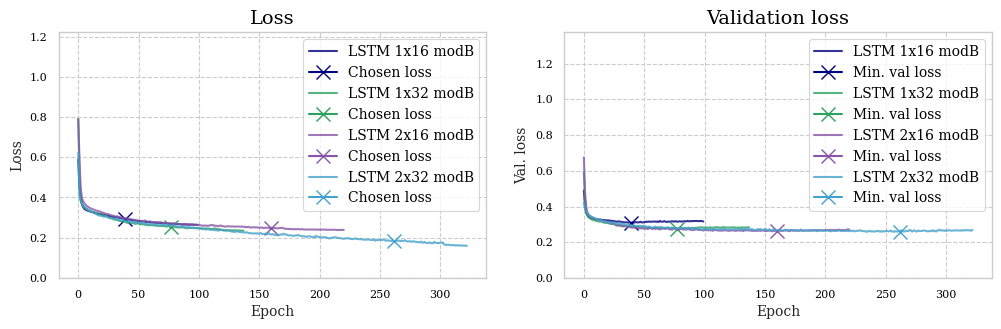

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9235   |  -2.2699   |
|  LSTM 1x16 modB |    0.7763   |  -0.4423   |
|  LSTM 1x32 modB |    0.7766   |  -0.3307   |
|  LSTM 2x16 modB |    0.7572   |  -0.2714   |
|  LSTM 2x32 modB |    0.7638   |  -0.5205   |
+-----------------+-------------+------------+


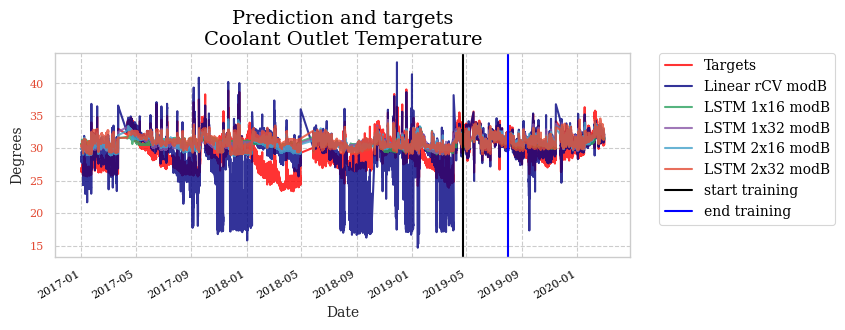

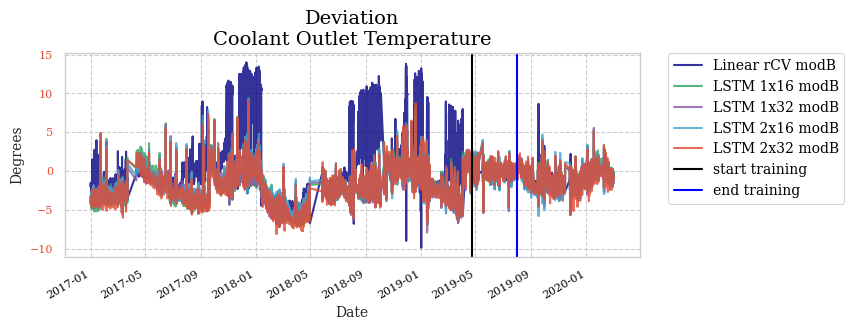

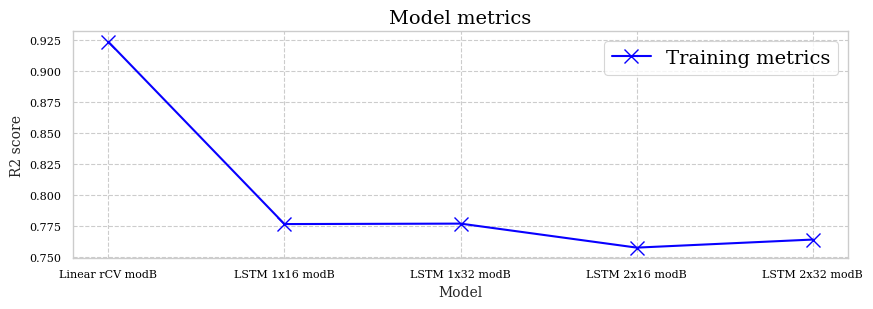

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
Model LSTM 1x64 modB was loaded from file
Model LSTM 1x128 modB was loaded from file
Model LSTM 2x64 modB was loaded from file
Model LSTM 2x128 modB was loaded from file
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  LSTM 1x64 modB |  0.211796 |   0.249161  |    0.285967   |  115   |
| LSTM 1x128 modB |  0.146634 |   0.207744  |    0.265781   |  142   |
|  LSTM 2x64 modB |  0.181555 |   0.212679  |    0.272078   |  152   |
| LSTM 2x128 modB |  0.103149 |   0.184685  |    0.267123   |  158   |
+-----------------+-----------+-------------+---------------+--------+


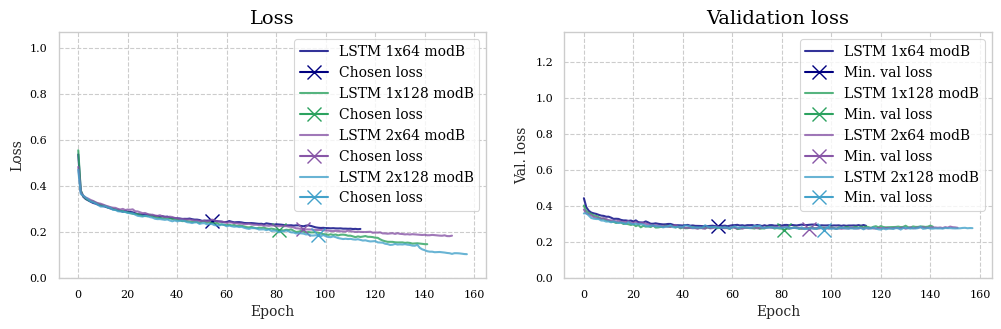

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| Linear rCV modB |    0.9235   |  -2.2699   |
|  LSTM 1x64 modB |    0.7829   |  -0.0526   |
| LSTM 1x128 modB |    0.7898   |  -0.0683   |
|  LSTM 2x64 modB |    0.7844   |  -0.0566   |
| LSTM 2x128 modB |    0.7849   |   0.0013   |
+-----------------+-------------+------------+


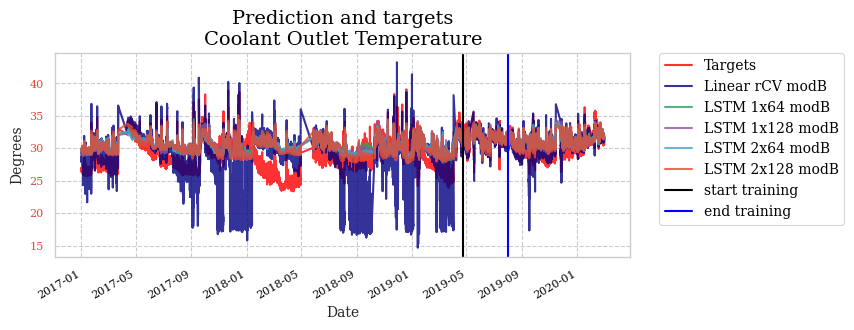

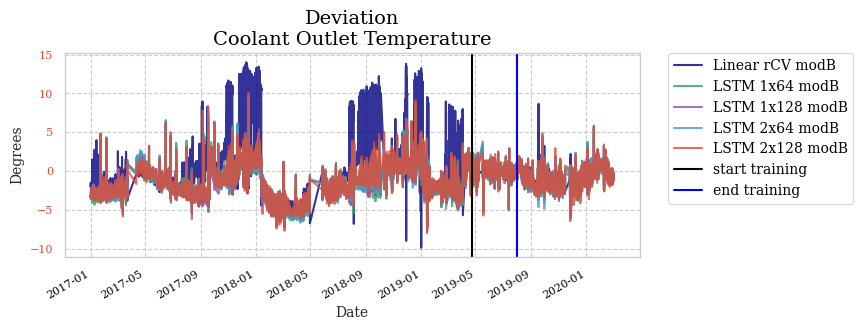

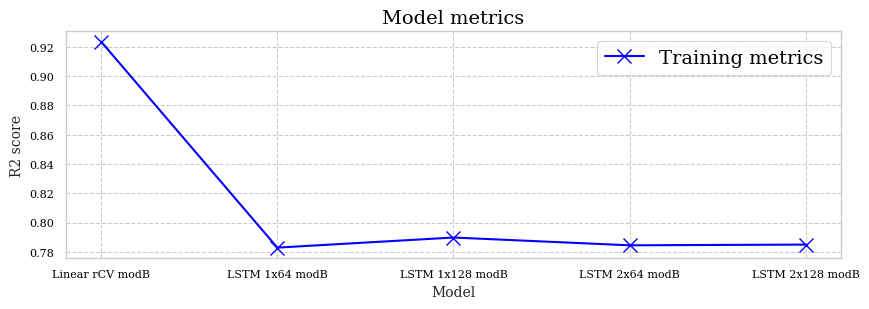

Training model Linear rCV modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
Model LSTM 1x128 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble LSTM 1x128 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
    Trained weights for Linear model of ensemble:
[[0.231034   0.76086125]]
Model LSTM 2x64 + Linear modB was loaded from file
Training submodel Linear rCV modB of Ensemble LSTM 2x64 + Linear modB
    Trained weights for Linear rCV modB:
[[ 0.28096044  0.0664614   0.01515006  0.00403552 -0.94254971]]
    Trained weights for Linear model of ensemble:
[[0.23435584 0.7597605 ]]
+-------------------------------------------+-----------+-------------+---------------+--------+
|                   Model                   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------------------------------------+-----------+-------

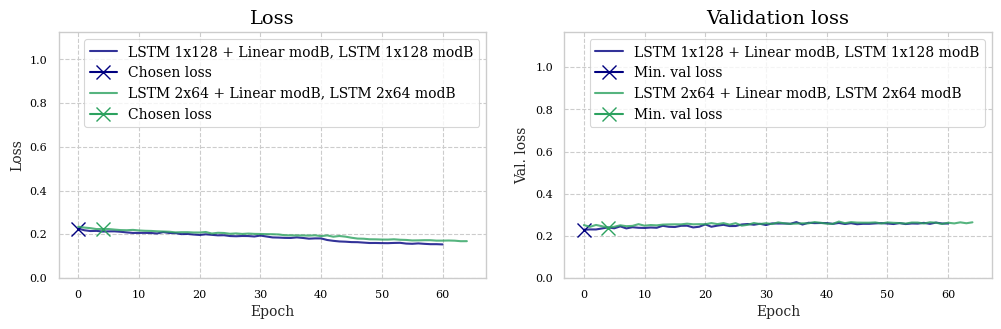

Model prediction scores
+--------------------------+-------------+------------+
|          Model           | Train score | Test score |
+--------------------------+-------------+------------+
|     Linear rCV modB      |    0.9235   |  -2.2699   |
| LSTM 1x128 + Linear modB |    0.9373   |  -1.3717   |
| LSTM 2x64 + Linear modB  |    0.9384   |   -1.378   |
+--------------------------+-------------+------------+


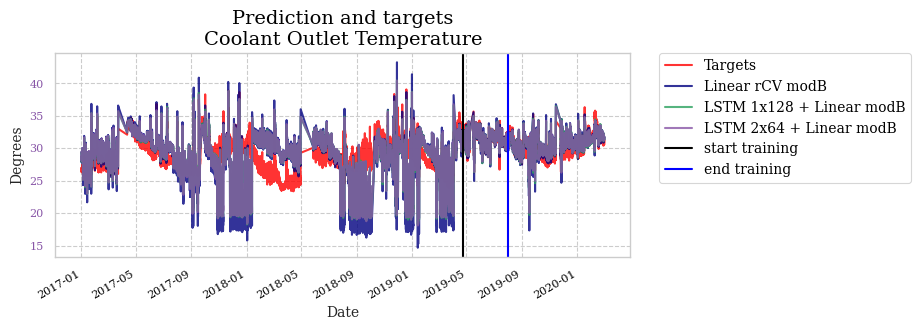

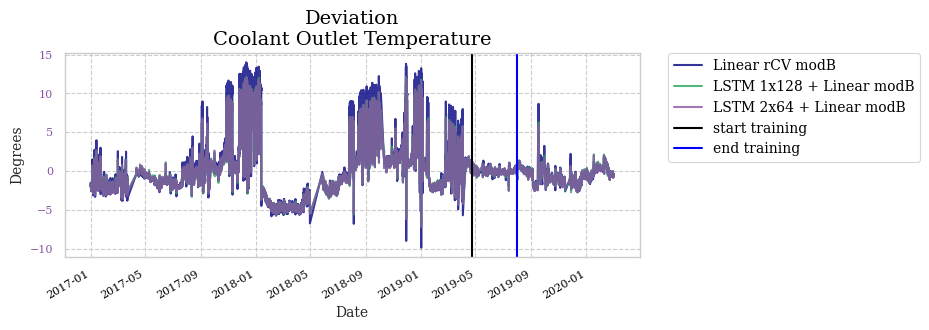

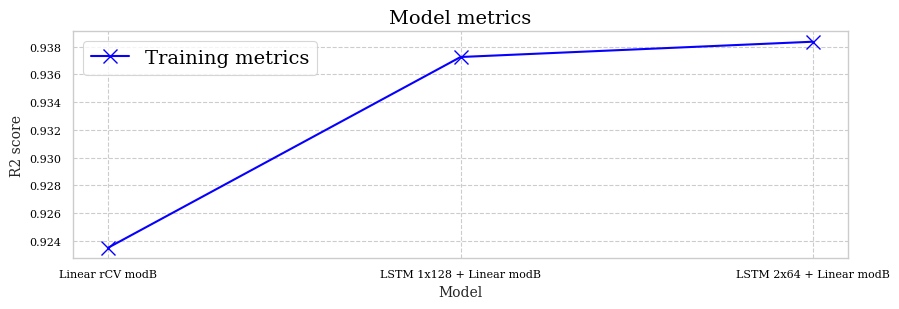

In [10]:
pred('G', 'B', '30min')

In [11]:
mlModule.reset()